In [1]:
import pbjam as pb
import pickle

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pickle_in = open("pb.pickle","rb")
edict = pickle.load(pickle_in)

In [3]:
pbag = pb.peakbag(edict['f'], edict['p'], edict['a'])

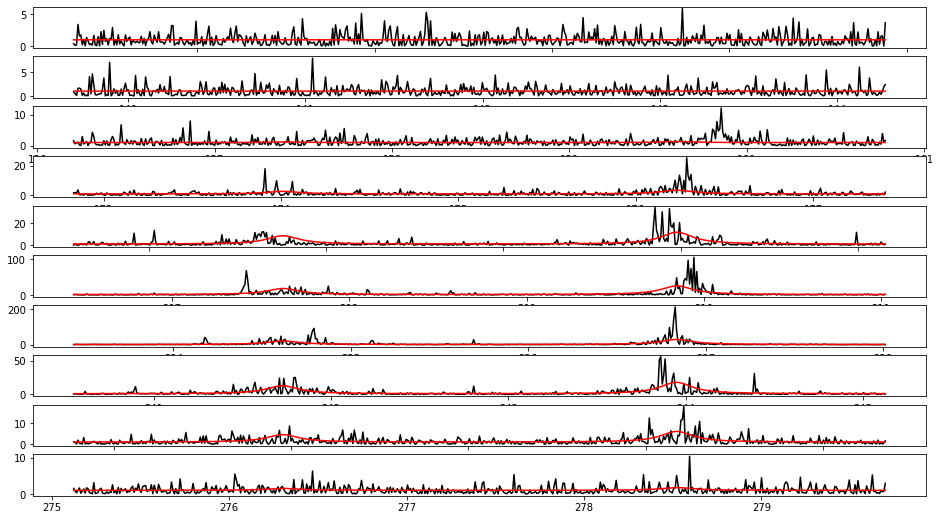

In [4]:
pbag.plot_start_model();

In [5]:
pbag.sample(model_type='simple', cores=4, tune=1500)

  0%|          | 0/100000 [00:00<?, ?it/s]/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Vers

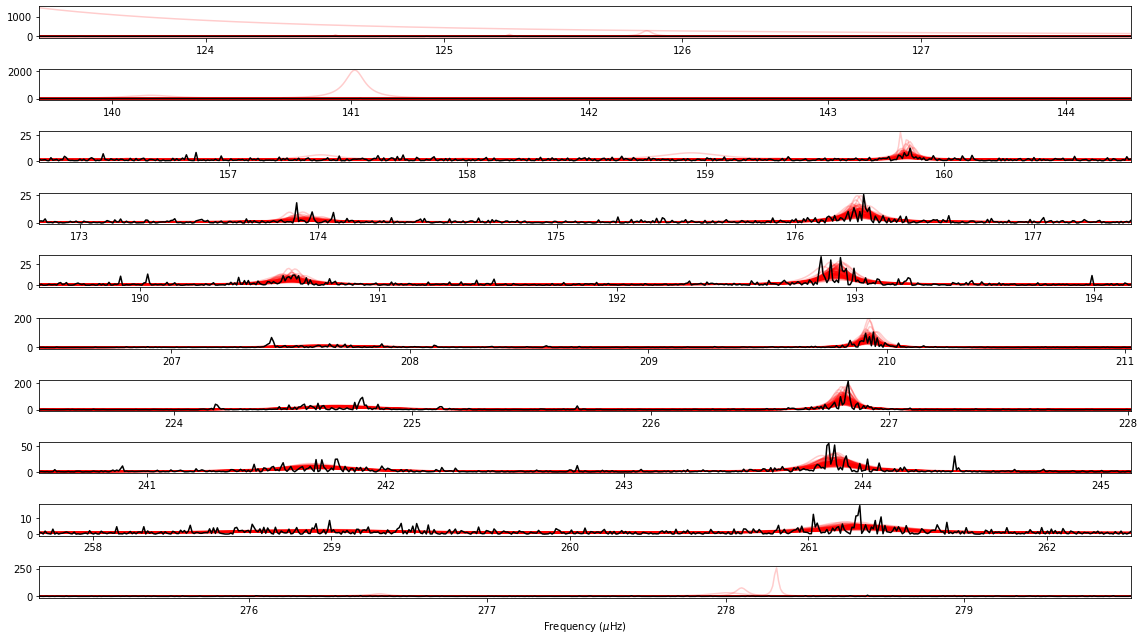

In [6]:
pbag.plot_fit(thin=10);

In [7]:
import pymc3 as pm
pm.summary(pbag.samples)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
l0__0,126.647563,1.946354,0.056592,1.231246e+02,130.560938
l0__1,143.169664,1.848306,0.050119,1.395464e+02,146.852819
l0__2,159.846816,0.017929,0.000542,1.598139e+02,159.882761
l0__3,176.264643,0.018784,0.000592,1.762300e+02,176.302522
l0__4,192.920767,0.015312,0.000447,1.928928e+02,192.949253
l0__5,209.924877,0.013054,0.000328,2.098996e+02,209.950638
l0__6,226.811096,0.013881,0.000422,2.267848e+02,226.838574
l0__7,243.889351,0.017770,0.000525,2.438549e+02,243.924810
l0__8,261.210480,0.037169,0.001068,2.611340e+02,261.281265
l0__9,278.774786,1.847951,0.064466,2.752188e+02,282.396848
